In [44]:
import numpy as np
from numpy.random import RandomState
import numdifftools as nd
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

RANDOM_STATE = 52
np.random.seed(RANDOM_STATE)
rs = RandomState(RANDOM_STATE)

# <font color = 'red'> ЛР 3. Регуляризация и линейная регрессия. Простейший градиентный спуск. </font>

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 17.09.2024

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Регуляризация.  </font>

**Регуляризация** - метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение.

Наиболее распростанены два вида регуляризации в линейной регресии это Грёбневая регуляризация (L2) и Лассо регуляризация (L1).

В случае линейной регрессии регуляризация предпалагает наложение штрафа на функцию потерь регрессии по следующим формулам. Все обозначения в терминах предыдущей ЛР.

$$ \mathcal{L1}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})^{T}(\overline{y} - Q\cdot\overline{w}) + \alpha||\overline{w}||_{1}, $$
$$ \mathcal{L2}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})^{T}(\overline{y} - Q\cdot\overline{w}) + \alpha||\overline{w}||_{2}, $$

Далее задача оптимизации решается уже относительно этих функций потерь.



<font color = 'red' size = 5>Задание 1 </font>

1. Используя встроенные функции пакета sklearn, реализуйте небольшие программы моделирующие лин. регрессию с регуляризацией L1 или L2 на искусственных данных. Сделайте выводы о поведении весовых коэффициентов в зависимости от разного количества фич в том числе полиномиальных.
2. Как регуляризация влияет на метрики качества моделей?
3. С какими проблемами вы столкнулись при использовании формулы вычисления весов регрессии из ЛР2? Можно ли их решить регуляризацией? С помощью матриц покажите на примере алгебраический смысл регуляризации.
4. Модифицируйте вашу собственную функцию для нахождения весов регрессии из ЛР2 таким образом, чтобы она соответсвовала функции потерь L2 - регуляризации. Аналитическое решение задачи оптимизации было получено на лекции. Сравните результаты работы вашей функции со встроенной.

In [5]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [6]:
def generete_1d_data(N = 100):
    x = rs.rand(N)
    y = np.log10(x) + rs.normal(0, 0.1, N)
    return x, y

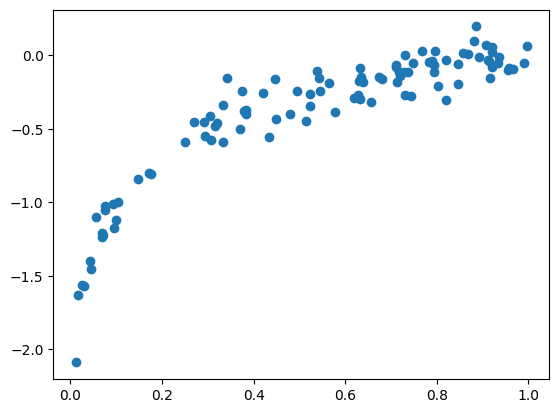

In [24]:
N = 100
x, y = generete_1d_data(N)

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()
plt.show()

In [13]:
x.shape, y.shape

((100,), (100,))

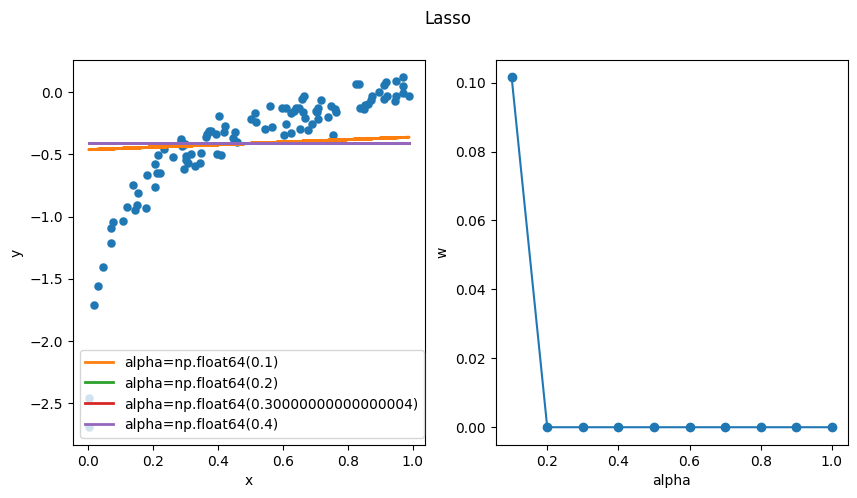

In [ ]:
x, y = generete_1d_data(N)

alphas = np.arange(0.1, 1.1, 0.1)
weights = []
y_preds = []

for alpha in alphas:
    model = Lasso(alpha=alpha, random_state=RANDOM_STATE)
    model.fit(x[:,np.newaxis], y)
    y_preds.append(model.predict(x[:,np.newaxis]))
    weights.append(model.coef_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Lasso')

ax1.scatter(x, y, linewidths=0.1)

colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

ax1.set_xlabel('x')
ax1.set_ylabel('y')
for y_pred, alpha, color in zip(y_preds, alphas, colors):
    ax1.plot(x, y_pred, linewidth=2, color=color, label=f'{alpha=}')
ax1.legend()

ax2.set_xlabel('alpha')
ax2.set_ylabel('w')
ax2.scatter(alphas, weights)
ax2.plot(alphas, weights)

plt.show()

In [30]:
def generete_2d_data(N):
    x1, x2 = rs.rand(N) * 2, rs.rand(N) * 2
    x = np.vstack([x1, x2]).T
    y = np.log10(x1) + x2**3 + rs.normal(0, 0.3, N)
    return x1, x2, x, y

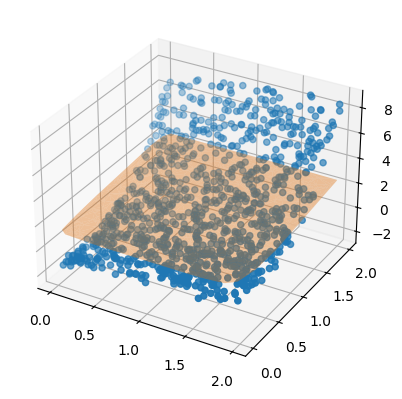

In [ ]:
N = 1000
x1, x2, x, y = generete_2d_data(N);

lasso = Lasso().fit(x, y) 
y_pred = lasso.predict(x)

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x1, x2, y)
ax.plot_trisurf(x1, x2, y_pred, color='tab:orange', alpha=0.4)
plt.show()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=RANDOM_STATE)

In [ ]:
# LASSO

C:\Users\Nikita\AppData\Local\Temp\ipykernel_30112\3707498145.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


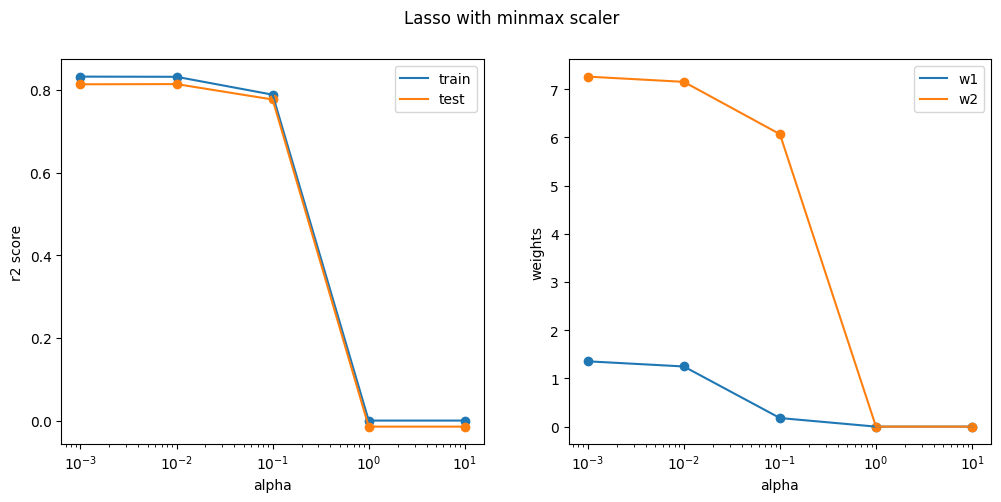

In [37]:
alphas = [10**-3, 10**-2, 10**-1, 1, 10]
scores_train = []
scores_test = []
weights = []

for alpha in alphas:
    model = make_pipeline(MinMaxScaler(), Lasso(alpha=alpha, random_state=RANDOM_STATE))
    model.fit(x_train, y_train)
    scores_train.append(r2_score(y_train, model.predict(x_train)))
    scores_test.append(r2_score(y_test, model.predict(x_test)))
    weights.append(model.get_params()['steps'][1][1].coef_)


weights = np.array(weights)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Lasso with minmax scaler')

ax1.set_xscale("log")
ax1.set_xlabel('alpha')
ax1.set_ylabel('r2 score')
ax1.scatter(alphas, scores_train)
ax1.plot(alphas, scores_train, label='train')
ax1.scatter(alphas, scores_test)
ax1.plot(alphas, scores_test, label='test')
ax1.legend()

ax2.set_xscale("log")
ax2.set_xlabel('alpha')
ax2.set_ylabel('weights')
ax2.scatter(alphas, weights[::,0])
ax2.plot(alphas, weights[::,0], label='w1')
ax2.scatter(alphas, weights[::,1])
ax2.plot(alphas, weights[::,1], label='w2')
ax2.legend()

fig.show()

C:\Users\Nikita\AppData\Local\Temp\ipykernel_30112\465156122.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


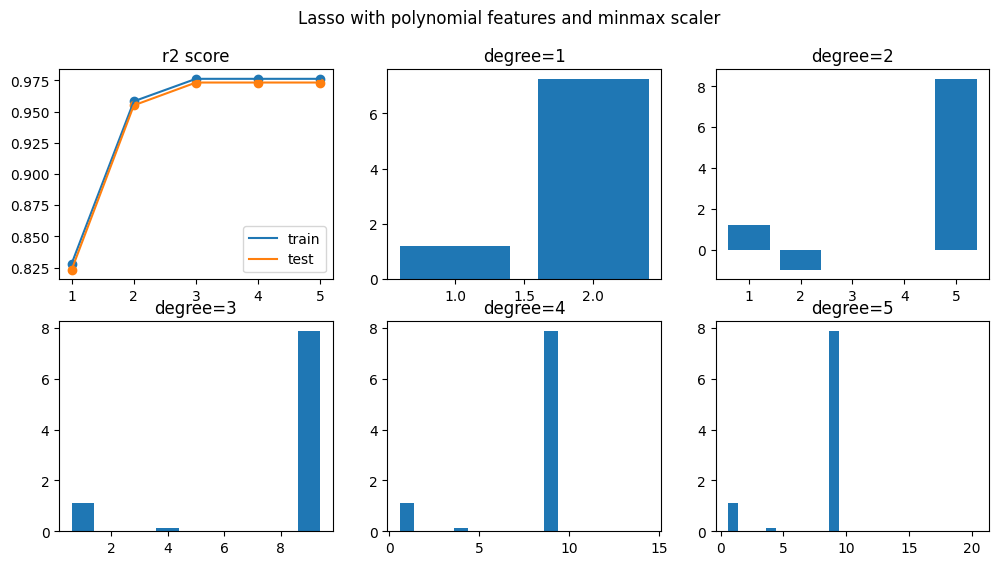

In [16]:
degrees = list(range(1,6))
scores_train = []
scores_test = []
weights = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), 
                          MinMaxScaler(), 
                          Lasso(alpha=10**-2, random_state=RANDOM_STATE))
    model.fit(x_train, y_train)
    scores_train.append(r2_score(y_train, model.predict(x_train)))
    scores_test.append(r2_score(y_test, model.predict(x_test)))
    weights.append(model.get_params()['steps'][-1][1].coef_)

fig, ((ax11, ax12, ax13), 
      (ax21, ax22, ax23)) = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Lasso with polynomial features and minmax scaler')

ax11.set_title(f'r2 score')
ax11.scatter(degrees, scores_train)
ax11.plot(degrees, scores_train, label='train')
ax11.scatter(degrees, scores_test)
ax11.plot(degrees, scores_test, label='test')
ax11.legend()

for i, ax in enumerate([ax12, ax13, ax21, ax22, ax23]):
    ax.set_title(f'degree={i+1}')
    ax.bar(range(1,weights[i].shape[0]+1), weights[i])

fig.show()

In [ ]:
#RIDGE

C:\Users\Nikita\AppData\Local\Temp\ipykernel_30112\2888692762.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


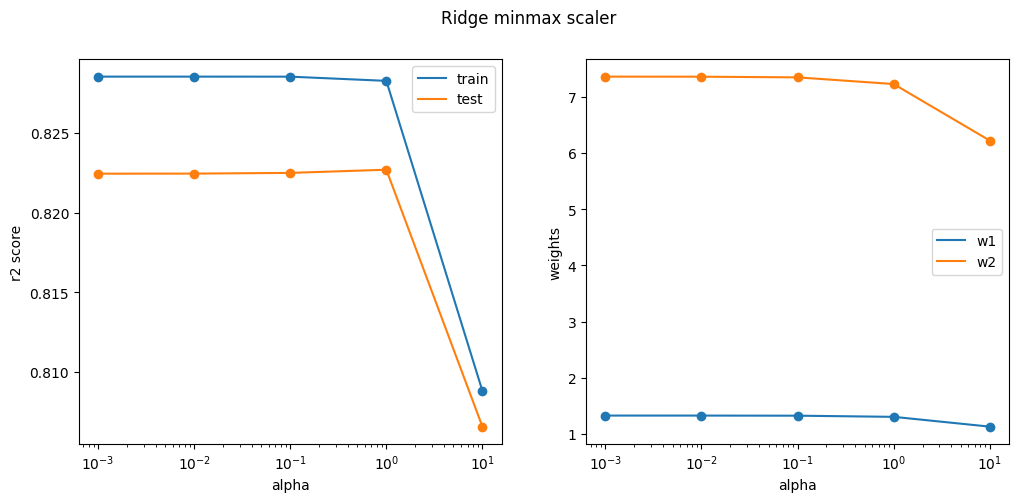

In [17]:
alphas = [10**-3, 10**-2, 10**-1, 1, 10]
scores_train = []
scores_test = []
weights = []

for alpha in alphas:
    model = make_pipeline(MinMaxScaler(), Ridge(alpha=alpha, random_state=RANDOM_STATE))
    model.fit(x_train, y_train)
    scores_train.append(r2_score(y_train, model.predict(x_train)))
    scores_test.append(r2_score(y_test, model.predict(x_test)))
    weights.append(model.get_params()['steps'][1][1].coef_)


weights = np.array(weights)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Ridge minmax scaler')

ax1.set_xscale("log")
ax1.set_xlabel('alpha')
ax1.set_ylabel('r2 score')
ax1.scatter(alphas, scores_train)
ax1.plot(alphas, scores_train, label='train')
ax1.scatter(alphas, scores_test)
ax1.plot(alphas, scores_test, label='test')
ax1.legend()

ax2.set_xscale("log")
ax2.set_xlabel('alpha')
ax2.set_ylabel('weights')
ax2.scatter(alphas, weights[::,0])
ax2.plot(alphas, weights[::,0], label='w1')
ax2.scatter(alphas, weights[::,1])
ax2.plot(alphas, weights[::,1], label='w2')
ax2.legend()

fig.show()

C:\Users\Nikita\AppData\Local\Temp\ipykernel_30112\2730237603.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


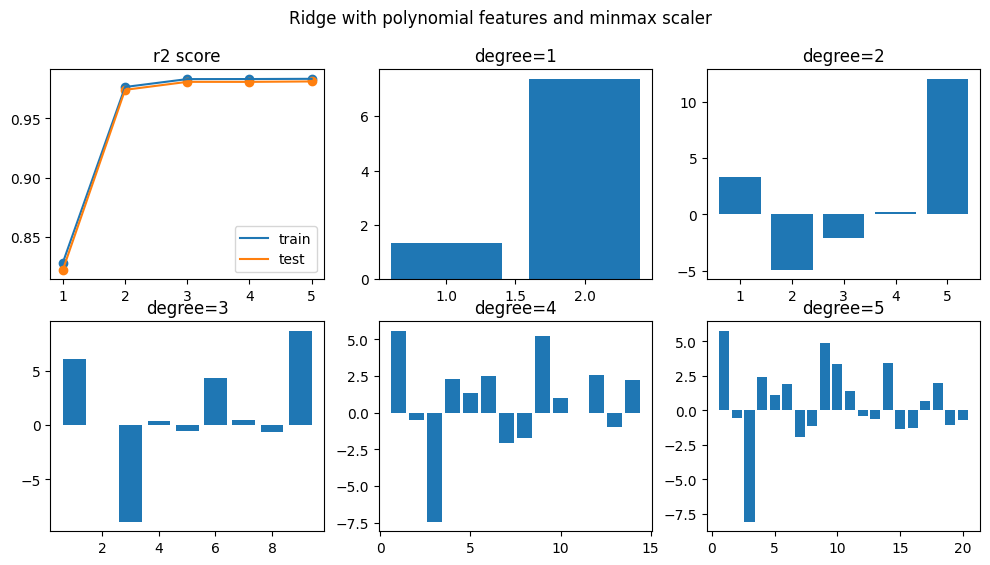

In [18]:
degrees = list(range(1,6))
scores_train = []
scores_test = []
weights = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), 
                          MinMaxScaler(), 
                          Ridge(alpha=10**-2, random_state=RANDOM_STATE))
    model.fit(x_train, y_train)
    scores_train.append(r2_score(y_train, model.predict(x_train)))
    scores_test.append(r2_score(y_test, model.predict(x_test)))
    weights.append(model.get_params()['steps'][-1][1].coef_)

fig, ((ax11, ax12, ax13), 
      (ax21, ax22, ax23)) = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Ridge with polynomial features and minmax scaler')

ax11.set_title(f'r2 score')
ax11.scatter(degrees, scores_train)
ax11.plot(degrees, scores_train, label='train')
ax11.scatter(degrees, scores_test)
ax11.plot(degrees, scores_test, label='test')
ax11.legend()

for i, ax in enumerate([ax12, ax13, ax21, ax22, ax23]):
    ax.set_title(f'degree={i+1}')
    ax.bar(range(1,weights[i].shape[0]+1), weights[i])

fig.show()

In [ ]:
# Lasso устремляет к нулю веса малозначимых фич. 
# Ridge старается компенсировать одни фичи другими

In [ ]:
# Если повышать коэффициент регуляризации, то метрика качества будет падать

In [ ]:
class RidgeCustom():
    
    def __init__(self, alpha):
        if alpha <= 0:
            raise ValueError
        
        self.weights = None
        self.alpha = alpha

        self.coef_ = None

    def fit(self, X, y):
        X = np.hstack([X, np.ones((X.shape[0], 1), dtype=int)])
        #self.alpha * np.eye(xx.shape[0]) -- регуляризатор
        self.weights = np.linalg.inv((xx:=(X.T @ X)) + self.alpha * np.eye(xx.shape[0])) @ X.T @ y
        self.coef_ = self.weights[:-1]
        return self

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        X = np.hstack([X, np.ones((X.shape[0], 1), dtype=int)])
        return X @ self.weights

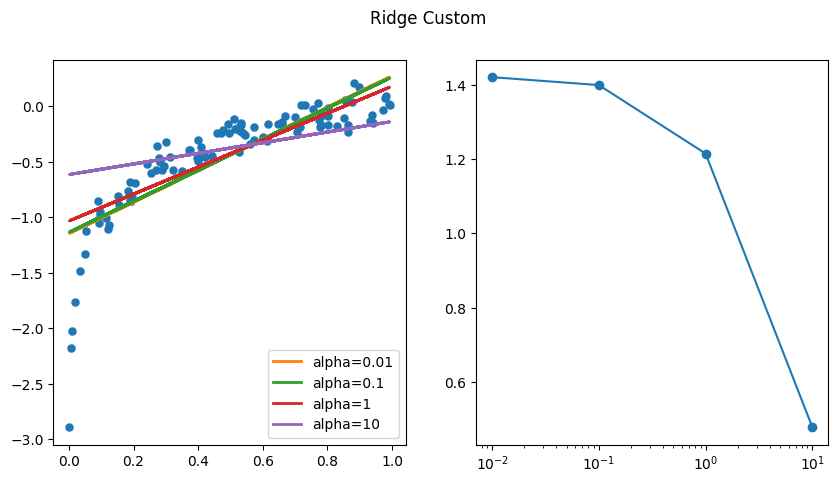

In [38]:
x, y = generete_1d_data()

alphas = [10**-2, 10**-1, 1, 10]
weights = []
y_preds = []

for alpha in alphas:
    model = RidgeCustom(alpha=alpha)
    model.fit(x[:,np.newaxis], y)
    y_preds.append(model.predict(x[:,np.newaxis]))
    weights.append(model.coef_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Ridge Custom')

ax1.scatter(x, y, linewidths=0.1)

colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for y_pred, alpha, color in zip(y_preds, alphas, colors):
    ax1.plot(x, y_pred, linewidth=2, color=color, label=f'{alpha=}')
ax1.legend()

ax2.set_xscale("log")
ax2.scatter(alphas, weights)
ax2.plot(alphas, weights)

plt.show()

In [ ]:
#На втором графике уменьшается значение весов, чтобы уменьшить переобучение

## <font color = 'green'> 2. Переобучение. </font>

**Переобучение** - явление, когда построенная модель МО хорошо объясняет примеры из обучающей выборки, но относительно плохо работает на примерах из тестовой выборки. 

<font color = 'orange' size = 3>Пример 1 </font>

Изучите следующий пример.

In [39]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(60)
y = x**2/10 + 0.9 * rng.randn(60)

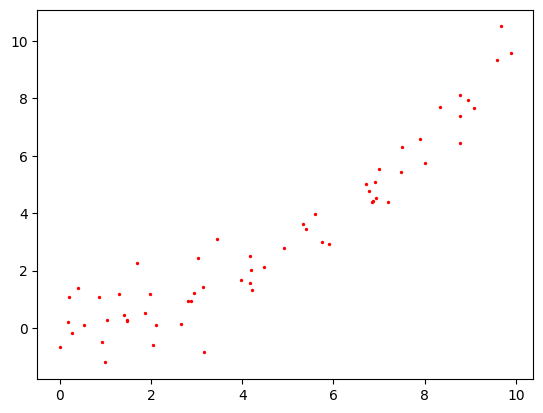

In [40]:
plt.scatter(x, y, c ='red',s=2)

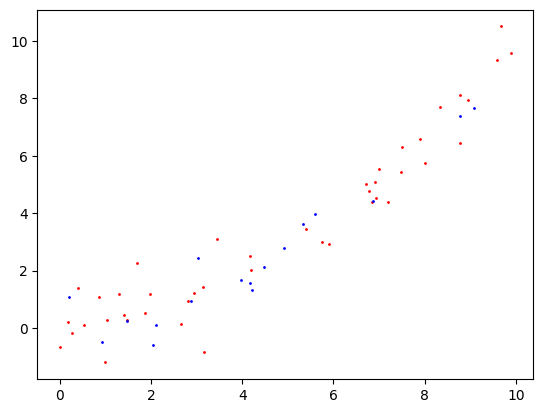

In [41]:
# разделили данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x[:, np.newaxis], y, test_size=0.27, random_state=42) 
plt.scatter(X_train, y_train, c='red', s=1)
plt.scatter(X_test, y_test, c='blue', s=1)

По наблюдениям из ЛР2 можно сделать вывод, что добавление полиномиальных фич (усложнение модели) повышает точность. Попробуем построить график, на котором увидим зависимость между метрикой R2 и степенью полиномиальных фич в модели. Это параметр можно считать гиперпараметром модели. 

**Гиперпараметры** – это внешние переменные конфигурации, с помощью которых специалисты по данным управляют обучением модели МО. Гиперпараметры (иногда их называют гиперпараметрами модели) настраиваются вручную перед обучением модели. Кстати, коэффициенты $\alpha$ в формулах регуляризаций тоже гиперпараметры.

График зависимости гиперпараметра от метрики качества модели называют  **валидационной кривой**.

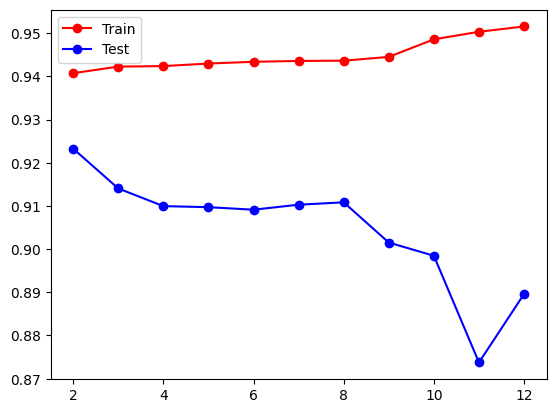

In [42]:
degress = list(range(2, 13))
scores_test = []
scores_train = []
for i in degress:
    model = make_pipeline(PolynomialFeatures(degree=i),
                          LinearRegression(fit_intercept=False))
    model.fit(X_train, y_train)
    scores_test.append(model.score(X_test, y_test))
    scores_train.append(model.score(X_train, y_train))
plt.plot(degress, scores_train, 'r-o')
plt.plot(degress, scores_test, 'b-o')
plt.legend(['Train', 'Test'])

Как видим, при увеличении количества полиномиальных фич наблюдаем падение качества валидации на тестовых данных, при росте качества на обучающих - классическое переобучение.

<font color = 'red' size = 5>Задание 2. </font>

1. На искусственных данных смоделируйте переобучение модели линейной регрессии. 
2. С помощью различных моделей регуляризации попробуйте сохранив сложность модели, которая увеличивает качество, избежать переобучения. Потренируйтесь в подборе коэффициентов силы регуляризации. 

In [43]:
def generate_x_squared(N = 150):
    x = 10 * rng.rand(N)
    y = x**2/10 + 0.9 * rng.randn(N)
    return x, y

In [ ]:
#LASSO

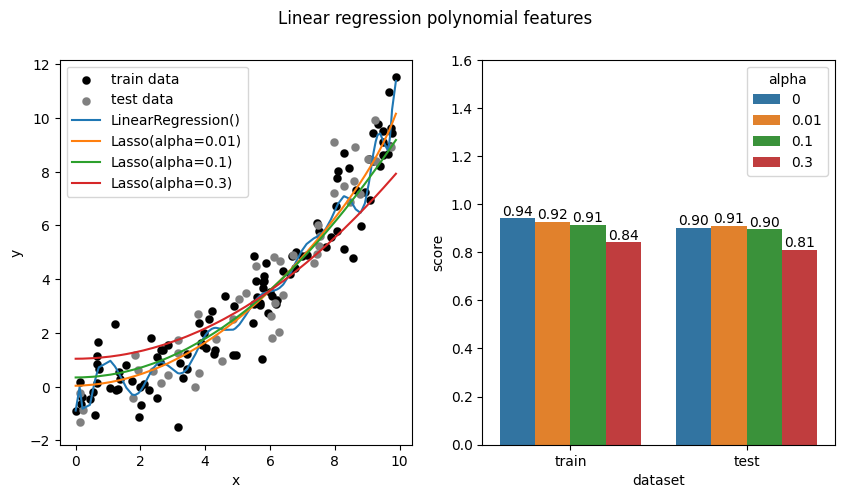

In [ ]:
x, y = generate_x_squared()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_STATE)

alphas = [0, 0.01, 0.1, 0.3]

df_scores = pd.DataFrame(columns=['alpha', 'dataset', 'score'])
models = []

for alpha in alphas:
    base_model = Lasso(alpha=alpha) if alpha != 0 else LinearRegression()
    model = make_pipeline(PolynomialFeatures(degree=20), MinMaxScaler(), base_model)
    model.fit(x_train[:,np.newaxis], y_train)
    models.append(model)
    y_pred = model.predict(x_test[:,np.newaxis])
    y_pred_train = model.predict(x_train[:, np.newaxis])
    df_scores.loc[len(df_scores.index)] = [str(alpha), 'train', r2_score(y_train, y_pred_train)]
    df_scores.loc[len(df_scores.index)] = [str(alpha), 'test', r2_score(y_test, y_pred)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Linear regression polynomial features (Lasso)')

ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.scatter(x_train, y_train, linewidths=0.1, label='train data', color='black')
ax1.scatter(x_test, y_test, linewidths=0.1, label='test data', color='grey')

for model in models:
    xy = dict(sorted(zip(x, model.predict(x[:,np.newaxis])), key = lambda o: o[0]))
    x_sorted, y_sorted = xy.keys(), xy.values()
    ax1.plot(x_sorted, y_sorted, label=f'{model.steps[-1][-1]}')

ax1.legend()


ax2 = sns.barplot(df_scores, x="dataset", y="score", hue="alpha")
ax2.set_ylim(top=1.6)
for cont in ax2.containers:
    ax2.bar_label(cont, fontsize=10, fmt='{:,.2f}')
plt.show()

In [ ]:
#RIGDE

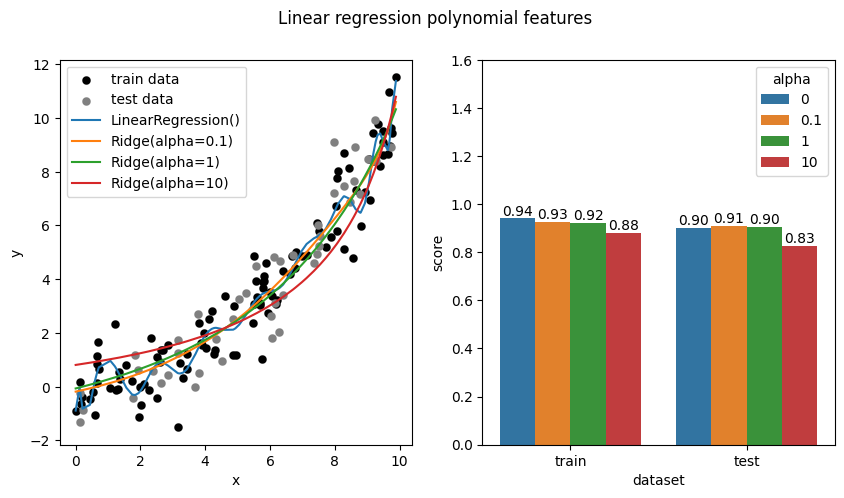

In [ ]:
alphas = [0, 0.1, 1, 10]

df_scores = pd.DataFrame(columns=['alpha', 'dataset', 'score'])
models = []

for alpha in alphas:
    base_model = Ridge(alpha=alpha) if alpha != 0 else LinearRegression()
    model = make_pipeline(PolynomialFeatures(degree=20), MinMaxScaler(), base_model)
    model.fit(x_train[:,np.newaxis], y_train)
    models.append(model)
    y_pred = model.predict(x_test[:,np.newaxis])
    y_pred_train = model.predict(x_train[:, np.newaxis])
    df_scores.loc[len(df_scores.index)] = [str(alpha), 'train', r2_score(y_train, y_pred_train)]
    df_scores.loc[len(df_scores.index)] = [str(alpha), 'test', r2_score(y_test, y_pred)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Linear regression polynomial features (Ridge)')

ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.scatter(x_train, y_train, linewidths=0.1, label='train data', color='black')
ax1.scatter(x_test, y_test, linewidths=0.1, label='test data', color='grey')

for model in models:
    xy = dict(sorted(zip(x, model.predict(x[:,np.newaxis])), key = lambda o: o[0]))
    x_sorted, y_sorted = xy.keys(), xy.values()
    ax1.plot(x_sorted, y_sorted, label=f'{model.steps[-1][-1]}')

ax1.legend()


ax2 = sns.barplot(df_scores, x="dataset", y="score", hue="alpha")
ax2.set_ylim(top=1.6)
for cont in ax2.containers:
    ax2.bar_label(cont, fontsize=10, fmt='{:,.2f}')
plt.show()

## <font color = 'green'> 3. Градиентный спуск.  </font>

В предыдущей ЛР мы решили задачу оптимизации, отыскав аналититческое решение в виде формулы. Способ хороший, но не всегда возможный в силу свойств функций и данных. Попробуем вооружиться ещё одним методом решения задач обучения моделей.

<font color = 'red' size = 5>Задание 3. </font>

1. Изучите базовый алгоритм [градиентного спуска](https://en.wikipedia.org/wiki/Gradient_descent)  по ссылке или лекционным записям. 
2. Реализуйте простой алгоритм градиентного спуска с постоянным шагом, для решения задачи нахождения минимума некторой функции двух переменных. Графически подтвердите ваши вычисления (на лекции был показан пример). 
3. Используя градиентный спуск, реализуйте собственную функцию обучения для какой либо из изученных ранее регрессий. Тщательно протестируйте. Всегда ли будет сходится (выдавать корректное решение) ваш алгоритм? От каким параметров зависит работа алгоритма? Сравните полученные резульататы со встроенными функциями.
4. Подумайте над улучшением алгоритма с точки зрения сходимости.
 

<font color = 'red' size = 5>Задание 4. </font>

1. Используя полученные знания о линейной регрессии примените их на реальных данных (два датасета ниже). Применяйте различные методы, стройте валидационные кривые, подбирайте гиперпараметры, преобразуйте данные, для получения лучших по качеству эстиматоров. 
2. При работе используйте не только встроенные, но и свои собственные функции. 
3. Самостоятельно изучите модель регуляризации [Elastic net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) и найдите ей применение.
4. Протестируйте работу Гуссовых базисныч фич. Подвержена ли такая модель переобучениКак регуляризация вляет на них?

Данные.

1. Данные о расходе топлива автомобилями по ссылке [AutoMpg](https://www.kaggle.com/datasets/uciml/autompg-dataset/data)
2. Цены на дома в Бостоне [housing](https://www.kaggle.com/datasets/altavish/boston-housing-dataset).


<font color = 'red' size = 5>Задание 5. </font>